In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare
import cluster



import warnings
warnings.filterwarnings("ignore")

## Bring in Data from CSV

In [2]:
df = pd.read_csv('zillow_df.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)

### Added in bed bath ratio

In [4]:
df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt

## Define X and y variables

In [5]:
X = df[['longitude', 'latitude', 'age', 'month',
        'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate', 'roomcnt',
        'Los_Angeles', 'Orange', 'Ventura', 'bed_bath_ratio']]
y = df[['logerror']]

## Split and Scale data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [7]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio
21711,0.157109,0.607455,0.031250,0.250,0.056347,0.000971,0.016757,0.003120,0.006246,0.029456,0.4,0.0,0.0,1.0,0.109375
72428,0.672587,0.529268,0.307292,1.000,0.047217,0.000355,0.010196,0.001509,0.003413,0.015319,0.0,1.0,0.0,0.0,0.101562
20516,0.713434,0.482563,0.437500,0.250,0.026790,0.001023,0.009455,0.003694,0.005455,0.015570,0.0,1.0,0.0,0.0,0.062500
42112,0.783232,0.490910,0.166667,0.625,0.032001,0.007152,0.010826,0.000849,0.002873,0.017562,0.0,1.0,0.0,0.0,0.062500
6853,0.598599,0.310265,0.208333,0.000,0.083829,0.001027,0.010961,0.006271,0.008308,0.015404,0.0,1.0,0.0,0.0,0.088542


## Two Fe/Value

     k         sse
0    2  136.655644
1    3   83.452117
2    4   65.259858
3    5   48.754761
4    6   39.836473
5    7   33.595030
6    8   29.507313
7    9   26.363700
8   10   23.479340
9   11   21.768495
10  12   19.939977
11  13   18.419776
12  14   17.025325
13  15   16.061997
14  16   14.966039
15  17   13.994029
16  18   13.114137
17  19   12.311221


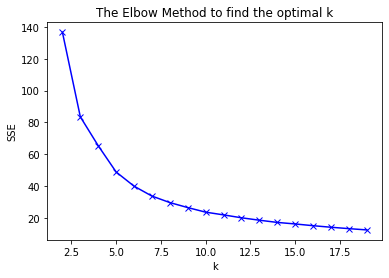

In [8]:
list_of_3_variables = train_scaled[['bed_bath_ratio', 'square_footage', 'tax_rate']]

optimal_k = cluster.elbow_method(list_of_3_variables)

In [9]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['bed_bath_ratio', 'square_footage', 'tax_rate'], 
                                                                                        'feature/value_cluster', train_scaled, test_scaled)

In [10]:
cluster_vars = ['bed_bath_ratio', 'square_footage', 'tax_rate']
cluster_col_name = 'feature/value_cluster'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [11]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [12]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,bed_bath_ratio,feature/value_cluster,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,6.0,0,0,1,1.600000,9,0.099353,0.054807,0.016373
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,0.0,1,0,0,1.500000,9,0.099353,0.054807,0.016373
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,0.0,1,0,0,1.000000,5,0.057778,0.039152,0.015373
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,0.0,1,0,0,1.000000,5,0.057778,0.039152,0.015373
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,0.0,1,0,0,1.333333,1,0.096894,0.096773,0.015655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,0.0,1,0,0,1.500000,9,0.099353,0.054807,0.016373
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,0.0,1,0,0,1.500000,1,0.096894,0.096773,0.015655
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,7.0,0,1,0,2.000000,0,0.140744,0.038679,0.016918
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,0.0,1,0,0,1.666667,1,0.096894,0.096773,0.015655


## Feature/Age/Value

     k         sse
0    2  293.148889
1    3  161.877891
2    4   94.565975
3    5   68.938498
4    6   56.353187
5    7   48.554810
6    8   43.193630
7    9   38.869119
8   10   33.601257
9   11   30.657117
10  12   26.833492
11  13   24.960292
12  14   22.329409
13  15   21.364914
14  16   20.205655
15  17   18.727801
16  18   17.860130
17  19   17.208241


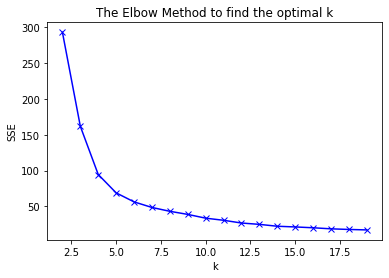

In [13]:
list_of_3_variables = train_scaled[['lot_size', 'age', 'full_value']]

optimal_k = cluster.elbow_method(list_of_3_variables)

In [14]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(10, ['lot_size', 'age', 'full_value'], 
                                                                                        'feature/age/value', train_scaled, test_scaled)

In [15]:
cluster_vars = ['lot_size', 'age', 'full_value']
cluster_col_name = 'feature/age/value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [16]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [17]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,...,Ventura,bed_bath_ratio,feature/value_cluster,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate,feature/age/value,centroid_lot_size,centroid_age,centroid_full_value
21711,-119173645.0,34238098.0,7.0,3,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,...,1,1.600000,9,0.099353,0.054807,0.016373,3,0.003170,0.047154,0.015997
72428,-118183524.0,34122442.0,60.0,9,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,...,0,1.500000,9,0.099353,0.054807,0.016373,8,0.001242,0.326039,0.007893
20516,-118105067.0,34053353.0,85.0,3,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,...,0,1.000000,5,0.057778,0.039152,0.015373,5,0.000986,0.473076,0.010666
42112,-117971000.0,34065700.0,33.0,6,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,...,0,1.000000,5,0.057778,0.039152,0.015373,1,0.005673,0.151083,0.009008
6853,-118325639.0,33798484.0,41.0,1,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,...,0,1.333333,1,0.096894,0.096773,0.015655,4,0.007550,0.209708,0.008309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30754,-118071760.0,34586675.0,61.0,4,1056.0,7257.0,132794.0,33198.0,165992.0,0.016483,...,0,1.500000,9,0.099353,0.054807,0.016373,8,0.001242,0.326039,0.007893
36351,-118337522.0,33783671.0,58.0,5,2220.0,23328.0,369551.0,1478204.0,1847755.0,0.011057,...,0,1.500000,1,0.096894,0.096773,0.015655,0,0.003350,0.272598,0.008870
51265,-117996812.0,33723862.0,55.0,6,1390.0,6001.0,86586.0,181689.0,268275.0,0.011759,...,0,2.000000,0,0.140744,0.038679,0.016918,0,0.003350,0.272598,0.008870
56584,-118281892.0,34522021.0,52.0,7,3123.0,225070.0,156736.0,13849.0,170585.0,0.012540,...,0,1.666667,1,0.096894,0.096773,0.015655,0,0.003350,0.272598,0.008870
